<a href="https://colab.research.google.com/github/chacha86/pythonai2/blob/main/%ED%95%99%EC%83%9D_%EC%84%B1%EC%A0%81_%EB%B6%84%EB%A5%98_%EC%98%88%EC%A0%9C_%ED%92%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# gender : 성별(M: 남, F: 여)
# Nationality : 국적
# PlaceofBirth : 출생국가
# StageID : 학교(초, 중, 고)
# GradeID : 학년
# SectionID : 반 이름
# Topic: 수강 과목
# Semester : 수강한 학기 (1학기/ 2학기)
# Relation : 주 보호자와 학생의 관계
# raisedhands : 수업중 손을 든 횟수
# VisitedResources: 학생이 교과 과정을 방문한 횟수
# AnnouncementsView: 학생이 과목 공지사항을 방문한 횟수
# Discussion : 학생이 토론에 참여한 횟수
# ParentAnsweringSurvey : 부모가 학교 설문에 참여했는지 여부
# ParentschoolSatisfaction : 부모가 학교에 만족했는지 여부
# StudentAbscenceDays : 학생의 결석 횟수(7회 이상/미만)
# Class : 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# 1. 판다스로 데이터 읽어오기
edu = pd.read_csv('/content/xAPI-Edu-Data.csv')


In [ ]:
# 2. 데이터의 개수, 데이터 타입, 결측치 확인

edu
edu.info()
edu.describe()


In [7]:
edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [ ]:
# 3. 시각화를 이용한 탐색적 분석
#  - 수치형 데이터의 탐색적 분석
#    - 히스토그램을 이용해 각 수치데이터의 데이터 분포 및 상관관계 확인
#    - 상관계수 확인
# edu.corr()

sns.histplot(data=edu, x='raisedhands', hue='Class') # 성적 분류에 유용한 지표로 볼 수 있다.



In [ ]:
sns.histplot(data=edu, x='VisITedResources', hue='Class') # 성적 분류에 유용한 지표로 볼 수 있다.

In [ ]:

#  - 범주형 데이터의 탐색적 분석  - 다음을 bar플롯을 이용해 그려주세요.
#    - 남녀의 성적 비율
#    - 국적에 따른 성적 비율
#    - 과목에 따른 성적 비율
#    - 부모의 설문 참여에 따른 성적 비율

plt.figure(figsize=(15,4))
sns.countplot(data=edu, x='NationalITy', hue='Class')

### raisedhands랑 VisITedResources를 같이 넣을 때와 하나만 넣을 때 비교해보자.


<Axes: xlabel='Topic', ylabel='count'>

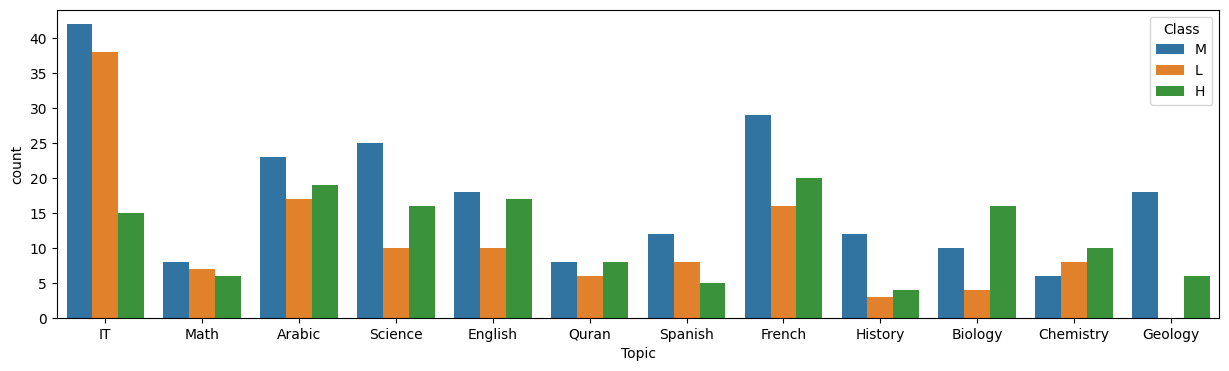

In [57]:
plt.figure(figsize=(15,4))
sns.countplot(data=edu, x='Topic', hue='Class')

In [24]:
# 4. 데이터 전처리하기

edu_num = edu.select_dtypes('int64')
edu_cate = edu.select_dtypes('object').drop('Class', axis=1)
target = edu['Class']




In [26]:
edu_cate_1hot = pd.get_dummies(edu_cate)

In [28]:
train = pd.concat([edu_num, edu_cate_1hot], axis=1)

In [ ]:
target.value_counts()

In [30]:
# 5. 학습용 데이터와 테스트용 데이터로 나누기

from sklearn.model_selection import train_test_split

trd, tsd, trt, tst = train_test_split(train, target, stratify=target, train_size=0.8, random_state=42)



In [40]:
# 6. 로지스틱 회귀를 이용해 학습하고 평가하기
# 교차 검증
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)
lr.fit(trd, trt)
lr.score(trd, trt), lr.score(tsd, tst)

# 과적합 -> 규제

lr.fit(trd, trt)
lr.score(trd, trt), lr.score(tsd, tst)

from sklearn.model_selection import GridSearchCV

param_grid = {
    "C" : [0.01, 0.1, 1, 10, 100]
}

gs = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5)


In [ ]:
gs.fit(trd, trt)

In [ ]:
print(gs.best_estimator_) # 최고 성능 모델
print(gs.best_score_)

best_lr = gs.best_estimator_

In [ ]:
best_lr.score(tsd, tst)


In [ ]:
# 7. 높은 성적(H)를 받는 데 영향을 미치는 요인 top3는 무엇인가요?
import numpy as np

  # 과학적 표기법 대신 소수점 6자리까지 나타낸다.
np.set_printoptions(precision=6, suppress=True)
pd.options.display.float_format = '{:.5f}'.format


best_lr.coef_

In [ ]:
rst = pd.DataFrame(best_lr.coef_, columns=best_lr.feature_names_in_, index=best_lr.classes_) # 각 클래스별 중요 특성 확인 가능

rst.loc['H'].sort_values(ascending=False)